In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve





df = pd.read_csv(r'C:\Users\tejab\OneDrive\Desktop\ML_Casestudy\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print(df['InternetService'])

0               DSL
1               DSL
2               DSL
3               DSL
4       Fiber optic
           ...     
7038            DSL
7039    Fiber optic
7040            DSL
7041    Fiber optic
7042    Fiber optic
Name: InternetService, Length: 7043, dtype: object


In [5]:
print(f"\nDataset Shape: {df.shape}")
print(f"Rows: {df.shape[0]:,}, Columns: {df.shape[1]}")

print(df.info())
print(df.describe())

# Missing values analysis
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent)      



Dataset Shape: (7043, 21)
Rows: 7,043, Columns: 21
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   obj

DATA CLEANING

In [6]:
# Force convert to numeric. 'coerce' turns the empty strings " " into NaNs
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill the missing values (Tenure=0 implies TotalCharges=0)
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# 3. Drop CustomerID (Useless for modeling)
df.drop(columns=['customerID'], inplace=True)

# 4. Standardize Target
# Convert 'Yes'/'No' to 1/0 immediately to make analysis easier
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

print("Cleaned Telco Data Shape:", df.shape)
print(df.info())

Cleaned Telco Data Shape: (7043, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  Payme

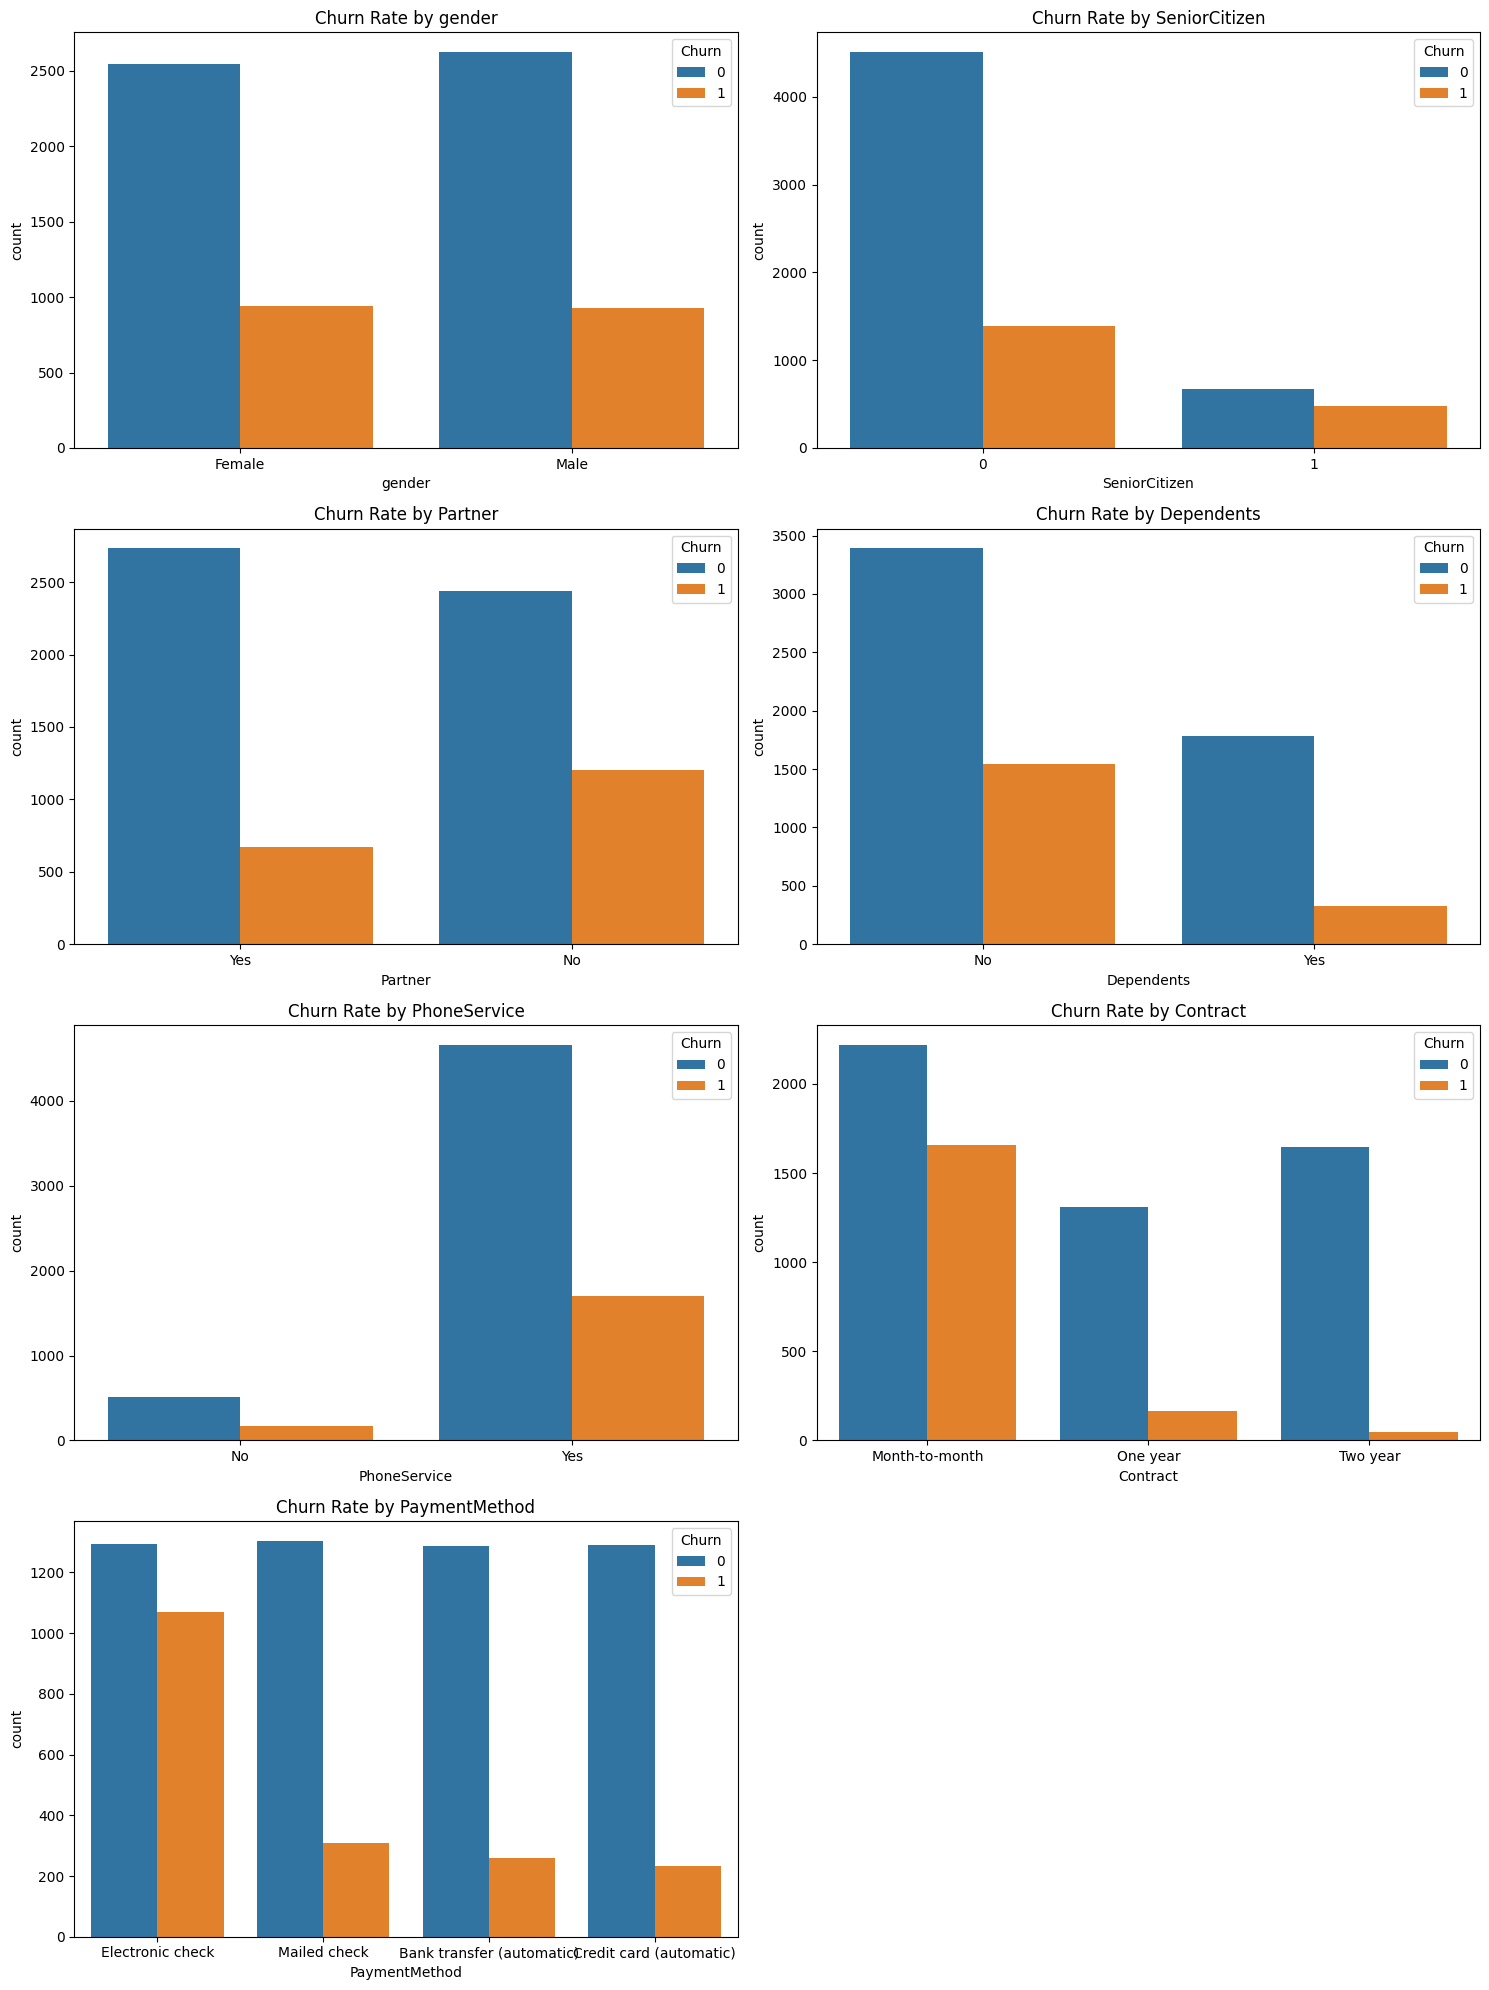

In [7]:
# Quick Loop to "See Everything"
# 1. Define Categorical Cols
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'Contract', 'PaymentMethod']

# 2. Loop and Plot
plt.figure(figsize=(15, 20))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 2, i)
    # The "hue" argument is the magic: it shows the split by Churn
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f"Churn Rate by {col}")

plt.tight_layout()
plt.show()

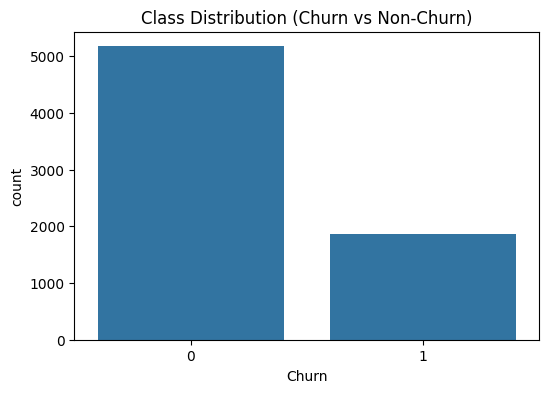

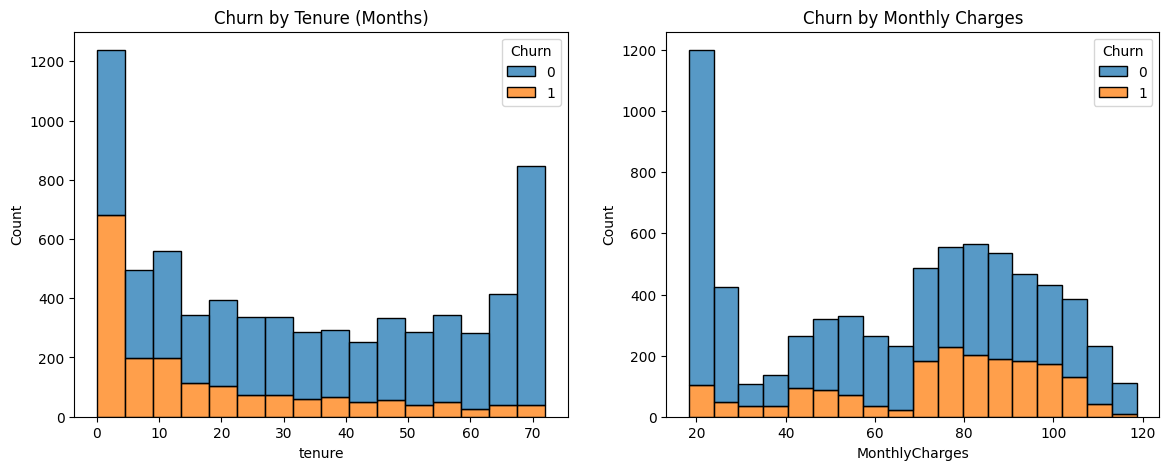

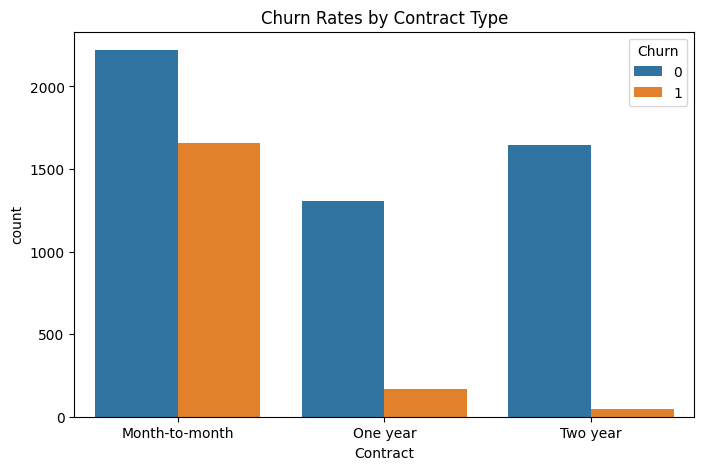

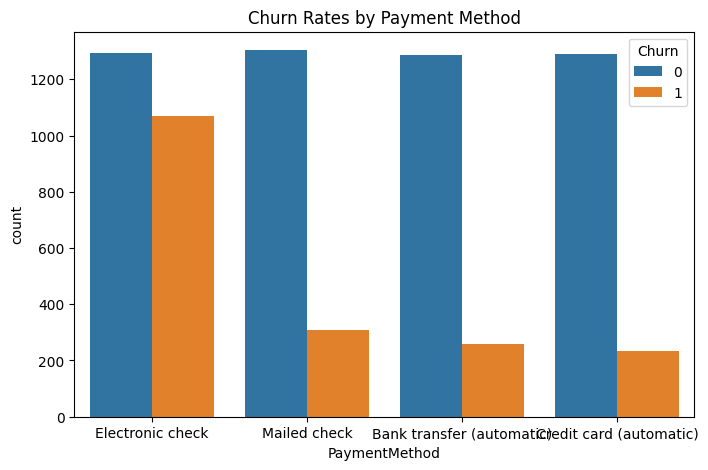

In [10]:
# 1. Target Balance
# Always show if the classes are imbalanced (Telco is usually ~26% Churn)
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title("Class Distribution (Churn vs Non-Churn)")
plt.show()

# 2. Numerical Distributions (Tenure & Monthly Charges)
# Insight: Do new customers leave more often? (Yes)
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', ax=ax[0])
ax[0].set_title("Churn by Tenure (Months)")

sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', ax=ax[1])
ax[1].set_title("Churn by Monthly Charges")
plt.show()

# 3. Categorical Impact (Contract Type)
# Insight: Month-to-month contracts have HUGE churn compared to 2-year contracts.
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn Rates by Contract Type")
plt.show()

#Payment Method impact
plt.figure(figsize=(8,5))
sns.countplot(x='PaymentMethod', hue='Churn', data = df)
plt.title("Churn Rates by Payment Method")
plt.show()


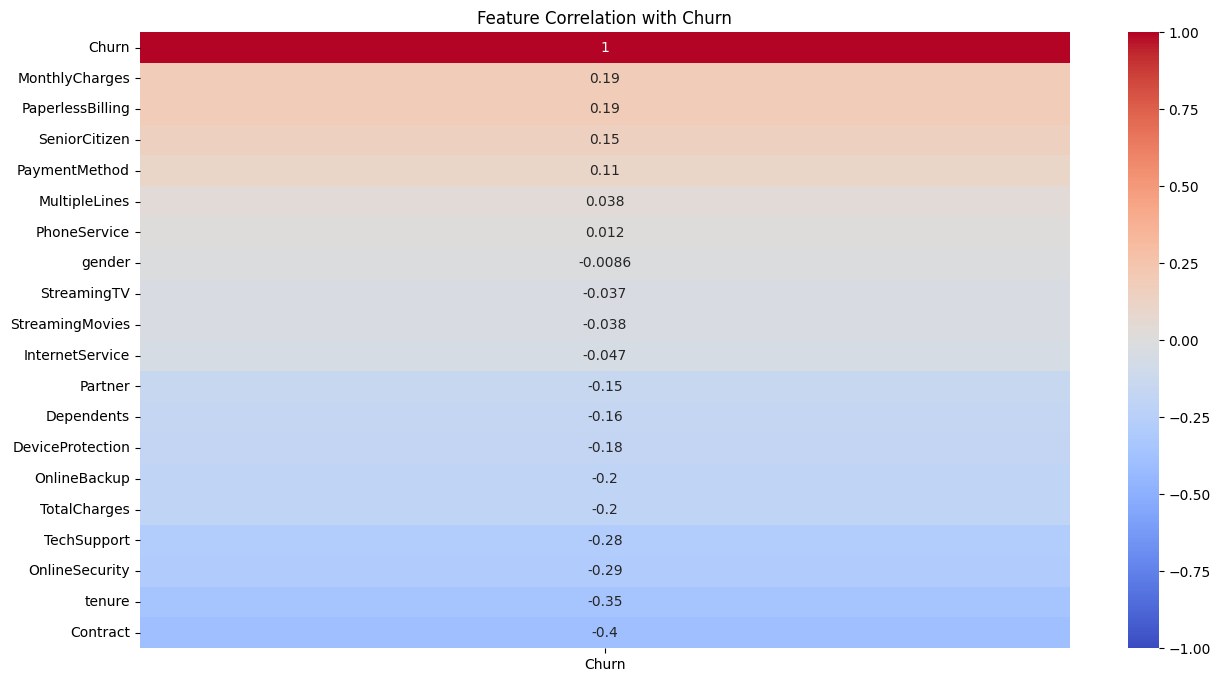

Top Positive Correlations:
 Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
Name: Churn, dtype: float64

Top Negative Correlations:
 Contract         -0.396713
tenure           -0.352229
OnlineSecurity   -0.289309
TechSupport      -0.282492
TotalCharges     -0.198324
Name: Churn, dtype: float64


In [11]:
# We create a temporary copy just for the heatmap.
df_corr = df.copy()

# Label Encode everything temporarily just to see the relationships
from sklearn.preprocessing import LabelEncoder
for col in df_corr.select_dtypes(include='object').columns:
    df_corr[col] = LabelEncoder().fit_transform(df_corr[col])

# --- 2. PLOT CORRELATION MATRIX ---
plt.figure(figsize=(15, 8))
# We care most about the 'Churn' column
correlation = df_corr.corr()
sns.heatmap(correlation[['Churn']].sort_values(by='Churn', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature Correlation with Churn")
plt.show()

# --- 3. ANALYZE RESULTS ---
print("Top Positive Correlations:\n", correlation['Churn'].sort_values(ascending=False).head(5))
print("\nTop Negative Correlations:\n", correlation['Churn'].sort_values(ascending=True).head(5))


In [13]:
cols_to_drop = ['gender', 'PhoneService'] 
# Note: We keep TotalCharges for the Transformer/RF, even if correlated with Tenure.
# Deep learning often benefits from the raw signal.

df_selected = df.drop(columns=cols_to_drop, errors='ignore')
print(f"\nDropped columns: {cols_to_drop}")
print(f"New Shape: {df_selected.shape}")
print(df_selected.info())


Dropped columns: ['gender', 'PhoneService']
New Shape: (7043, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   MultipleLines     7043 non-null   object 
 5   InternetService   7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  PaperlessBilling  7043 non-null   object 
 14  PaymentMethod     7043 non-null   object 
 15  MonthlyCharges    7043

In [14]:
print(df_selected['Churn'])

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# --- DEFINING FEATURE GROUPS ---
# Identify which columns are what
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# All other columns (except Churn) are categorical
cat_cols = [c for c in df.columns if c not in num_cols and c != 'Churn']

print(f"Numerical Features: {len(num_cols)}")
print(f"Categorical Features: {len(cat_cols)}")

Numerical Features: 3
Categorical Features: 16


In [16]:
  
# 1. Split Data First (Avoid Leakage)
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# 2. Apply Model-Specific Transformations

#RF

X_train_enc = X_train.copy()
X_test_enc = X_test.copy()

# Simple Label Encoding for everything
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    le.fit(pd.concat([X_train[col], X_test[col]]))
    X_train_enc[col] = le.transform(X_train[col])
    X_test_enc[col] = le.transform(X_test[col])
    label_encoders[col] = le

In [ ]:
# Scale Numerics - for the other three models
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[num_cols])
X_test_num = scaler.transform(X_test[num_cols])


X_train_cat = []
X_test_cat = []
vocab_sizes = {}
    
for col in cat_cols:
    le = LabelEncoder()
    le.fit(pd.concat([X_train[col], X_test[col]]))
    X_train_cat.append(le.transform(X_train[col]))
    X_test_cat.append(le.transform(X_test[col]))
    vocab_sizes[col] = len(le.classes_)
        
X_train_cat = np.stack(X_train_cat, axis=1)
X_test_cat = np.stack(X_test_cat, axis=1)

Have to do you models from here